In [171]:
import pandas as pd
import tweepy
import requests
from PIL import Image
from io import BytesIO
import json
import time

***Gathering Data***

**Project Motivation**

Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

The Data
Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.

Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Key Points
Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

**Project Details**


The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

**1. We need to grab Twitter archived data**

In [172]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [173]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [174]:
tweet_archive.shape

(2356, 17)

In [175]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. We need to programmatically download tweet image predictions**
 - File is called 'image_predictions.tsv'

In [176]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [177]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [178]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Load the Twitter API**

We want to access the Twitter API and populate two lists:
- list_available_tweets = Tweets we're able to successfully pull from API
- unavailable_tweets = Tweet IDs which we're unable to pull from API

We'll be looking up the Tweet ids within the 'tweet_archive' table

In [179]:
consumer_key = 'C8TuCQ9IbnUxpfNxvSya9xJRk'
consumer_secret = 'HS4Ib5GAR5lPfQMSgHa8mRhxqNpIxemzxxOCOcFEMiYGuZVuea'
access_token = '2467891428-uz3imSo732perLS9mXpa28SOyjK2yTwowvEU0pV'
access_secret = 'N8uD1GudjCXwoMvmNePBGhku2cFI35XxzWgqWMd1KEWav'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [180]:
#List of tweets
list_available_tweets = []
#list of error tweets
unavailable_tweets = []
#start time of execution
start = time.time()

for tweet_id in tweet_archive.tweet_id:
    try:
        tweet = api.get_status(tweet_id)
        list_available_tweets.append(tweet)
    except Exception as e:
        unavailable_tweets.append(tweet_id)
#End time of execution
end = time.time()
print(end - start)

Rate limit reached. Sleeping for: 746
Rate limit reached. Sleeping for: 744
1906.0781190395355


In [181]:
#Out of 2356 tweet ids, 25 are unavailable which is not to bad
len(list_available_tweets), len(unavailable_tweets)

(2331, 25)

We want to be able to capture and read only the json aspects of the list, which the code will enable us to do.

In [182]:
available_tweets_json = []
for tweet in list_available_tweets:
    available_tweets_json.append(tweet._json)

Now we want to create a pandas DataFrame with the dictionary keys set as headers.

In [183]:
#Grab the dictionary keys and convert into a list
headers = []
for i in available_tweets_json[0].keys():
    headers.append(i)

In [184]:
json_tweets = pd.DataFrame(available_tweets_json, columns = headers)

In [185]:
json_tweets.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,None,None,False,7582,35818,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L",True,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/aQFSeaCu9L', 'expanded_url': 'https://twitter.com/i/web/status/892177421306343426', 'display_url': 'twitter.com/...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,None,None,False,5622,30921,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.… https://t.co/r0YlrsGCgy,True,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/r0YlrsGCgy', 'expanded_url': 'https://twitter.com/i/web/status/891815181378084864', 'display_url': 'twitter.com/...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,None,None,False,3720,23259,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,None,None,False,7764,39079,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected a… https://t.co/0g0KMIVXZ3",True,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0g0KMIVXZ3', 'expanded_url': 'https://twitter.com/i/web/status/891327558926688256', 'display_url': 'twitter.com/...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,None,None,False,8360,37341,False,False,False,False,en


We want to do a bit of cleaning and ensure that we are only capturing the columns that we want:

- 'id', 'geo', 'retweet_count', 'favorite_count'. 

In essence we'll need to drop all columns bar: 

- 'id', 'geo', 'retweet_count', 'favorite_count'

In [186]:
headers_clean = []
for item in headers:
    if (item != 'id'): 
        if (item != 'created_at'):
            if (item != 'retweet_count'):
                if (item != 'favorite_count'):
                    headers_clean.append(item)

In [187]:
headers_clean, len(headers_clean)

(['id_str',
  'text',
  'truncated',
  'entities',
  'extended_entities',
  'source',
  'in_reply_to_status_id',
  'in_reply_to_status_id_str',
  'in_reply_to_user_id',
  'in_reply_to_user_id_str',
  'in_reply_to_screen_name',
  'user',
  'geo',
  'coordinates',
  'place',
  'contributors',
  'is_quote_status',
  'favorited',
  'retweeted',
  'possibly_sensitive',
  'possibly_sensitive_appealable',
  'lang'],
 22)

In [188]:
json_tweets.drop(columns = headers_clean, inplace=True)

In [189]:
#check to see that we are only left with intended columns
json_tweets.head()

,created_at,id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,7582,35818
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,5622,30921
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,3720,23259
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,7764,39079
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,8360,37341


Now we want to save the newly formated json_tweets table to a text file called 'tweet_json.txt'

In [190]:
#Save pandas to CSV file:
json_tweets.to_csv('tweet_json.txt', index = False)

In [191]:
#Test to see that CSV has been created
tweet_json = pd.read_csv('tweet_json.txt')
tweet_json.head()

,created_at,id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,7582,35818
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,5622,30921
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,3720,23259
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,7764,39079
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,8360,37341


## Assessing Data

*Start assessing the data for quality and tidyness issues. We need to detect and document at least 8 quality issues and 2 tidiness issues.*

### Quality Issues:

**Tweet_archive set**
- timestamp column should be reformatted to DateTime
- invalid denominator_ratings values with some values having a value that is not 10
- rating_numerator goes up to 1776
- rating columns need to be reformated to floats as some of the ratings should be floats but are not being picked up properly from the tweet copy.
- tweet_id is formated to interger and needs to be changed to string.
- Want to remove retweets, these can be identified by seeing if there are values within retweeted_status_id

**Image_prediction**
- Some issues with the names itself i.e. 'shopping_cart' which isn't a name of a dog

**tweet_json**
- tweet_id is formated to interger and needs to be changed to string.
- created_at column should be reformatted to DateTime


### Tidyness Issues:
- All 3 tables should be merged on tweet_id as each table is themed around dogs

**Tweet_archive set**
- The last four columns all relate to the same Dog variable and should have these columns melted

**Image_prediction**
- We are only interested in understanding the True predicted outcome of Dogtype. Create additional column which only shows the correctly predicted dogtype alongside the acompanying image. Also include an additional column with the confidence interval




In [192]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [193]:
tweet_archive.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [194]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [195]:
tweet_archive.shape

(2356, 17)

In [196]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [197]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [198]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [199]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [200]:
image_prediction.shape

(2075, 12)

In [201]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [202]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [203]:
tweet_json

,created_at,id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,7582,35818
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,5622,30921
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,3720,23259
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,7764,39079
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,8360,37341
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,2806,18815
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,1825,10927
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,16953,60324
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,3858,25898
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,6600,29574


In [204]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
created_at        2331 non-null object
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [205]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2664.583441,7478.220935
std,6.823170e+16,4506.185420,11612.212888
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,540.000000,1300.500000
50%,7.182469e+17,1245.000000,3251.000000
75%,7.986692e+17,3095.500000,9157.500000
max,8.924206e+17,76587.000000,154333.000000


In [206]:
tweet_json.sort_values(by=['favorite_count'], ascending = False)

,created_at,id,retweet_count,favorite_count
1015,Sat Jun 18 18:26:18 +0000 2016,744234799360020481,76587,154333
397,Sat Jan 21 18:26:02 +0000 2017,822872901745569793,43164,131626
517,Fri Dec 09 06:17:20 +0000 2016,807106840509214720,55825,119262
129,Mon May 22 00:28:40 +0000 2017,866450705531457537,32503,115279
1055,Sat Jun 04 23:31:25 +0000 2016,739238157791694849,56925,114124
65,Mon Jun 26 19:07:24 +0000 2017,879415818425184262,40085,98282
433,Wed Jan 11 02:15:36 +0000 2017,819004803107983360,36946,87219
162,Tue May 02 00:04:57 +0000 2017,859196978902773760,28267,85620
1741,Sun Dec 20 02:20:55 +0000 2015,678399652199309312,30954,78266
111,Thu Jun 01 20:18:38 +0000 2017,870374049280663552,24252,77891


# Cleaning

We are going to follow the process outlined below to address the issues identified during the assessment:

- Define
- Code
- Clean

In [207]:
#Lets make a copy of each of the three DFs before cleaning
tweet_json_copy = tweet_json.copy()
tweet_archive_copy = tweet_archive.copy()
image_prediction_copy = image_prediction.copy()

**Define & Code:** 
- All 3 tables should be merged on tweet_id as each table is themed around dogs.
- We'll need to rename the column within the 'tweet_json_copy' table from 'id' to 'tweet_id' so that we can do a daisy chain merge between the three tables.

In [208]:
tweet_json_copy.head()

,created_at,id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,7582,35818
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,5622,30921
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,3720,23259
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,7764,39079
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,8360,37341


In [209]:
tweet_json_copy.rename(columns = {'id': 'tweet_id'}, inplace = True)

In [210]:
tweet_json_copy.head()

,created_at,tweet_id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,7582,35818
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,5622,30921
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,3720,23259
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,7764,39079
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,8360,37341


In [211]:
tweet_json_copy.shape, tweet_archive_copy.shape, image_prediction_copy.shape

((2331, 4), (2356, 17), (2075, 12))

In [212]:
twitter_full_merged = pd.merge(tweet_json_copy, tweet_archive_copy, on = 'tweet_id')
twitter_full = pd.merge(twitter_full_merged, image_prediction_copy, on = 'tweet_id')

**Test**
- We should have 31 columns and less rows than 2075

In [213]:
twitter_full.shape

(2059, 31)

In [214]:
twitter_full.head()

,created_at,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,7582,35818,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,5622,30921,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,3720,23259,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,7764,39079,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,8360,37341,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


**Define and Code:**

**Reformatting**
- timestamp column should be reformatted to DateTime
- created_at column should be dropped as this is the same as the timestamp column
- tweet_id is set to interger and needs to be changed to string.

In [215]:
#Drop 'created_at' column
twitter_full.drop(columns = 'created_at', inplace = True)

In [216]:
#import datetime and strip the last 6 characters
import datetime
twitter_full.timestamp = twitter_full.timestamp.str[:-6]

In [217]:
#convert column to DateTime
twitter_full.timestamp = pd.to_datetime(twitter_full.timestamp, format = '%Y-%m-%d %H:%M:%S')

In [218]:
#Reformat 'Tweet_id' column from integer to string
twitter_full.tweet_id = twitter_full.tweet_id.astype(str)

**Test**

In [219]:
twitter_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null object
retweet_count                 2059 non-null int64
favorite_count                2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null datetime64[ns]
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                      

**Define and Code:**

- rating columns need to be reformated to floats as some of the ratings should be floats

In [220]:
#Change format to float
twitter_full[['rating_numerator', 'rating_denominator']] = twitter_full[['rating_numerator', 'rating_denominator']].astype(float)

**Test - Reformatting worked**

In [221]:
twitter_full[['text' , 'rating_numerator', 'rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 3 columns):
text                  2059 non-null object
rating_numerator      2059 non-null float64
rating_denominator    2059 non-null float64
dtypes: float64(2), object(1)
memory usage: 64.3+ KB


In [222]:
twitter_full[['text' , 'rating_numerator', 'rating_denominator']].head()

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0


**Define and Code - Fix ratings (part 1):**

- The following tweet_id's do not have ratings within the copy itself and can be removed: 
    - '810984652412424192'
    
    
- The following tweet_id's need to have ratings manually updated: 
    - '740373189193256964' -> 14 / 10
    - '722974582966214656' -> 13 / 10
    - '716439118184652801' -> 11 / 10
    - '682962037429899265' -> 10 / 10
    - '666287406224695296' -> 9 / 10   

In [223]:
#Drop row with tweet_id = '810984652412424192'
twitter_full = twitter_full[twitter_full.tweet_id != '810984652412424192']

In [224]:
#The following tweet_id's need to have ratings manually updated:
#'740373189193256964' -> 14 / 10
#'722974582966214656' -> 13 / 10
#'716439118184652801' -> 11 / 10
#'682962037429899265' -> 10 / 10
#'666287406224695296' -> 9 / 10
twitter_full.loc[twitter_full.tweet_id == '740373189193256964', 'rating_numerator'] = 14
twitter_full.loc[twitter_full.tweet_id == '740373189193256964', 'rating_denominator'] = 10

twitter_full.loc[twitter_full.tweet_id == '722974582966214656', 'rating_numerator'] = 13
twitter_full.loc[twitter_full.tweet_id == '722974582966214656', 'rating_denominator'] = 10

twitter_full.loc[twitter_full.tweet_id == '716439118184652801', 'rating_numerator'] = 11
twitter_full.loc[twitter_full.tweet_id == '716439118184652801', 'rating_denominator'] = 10

twitter_full.loc[twitter_full.tweet_id == '682962037429899265', 'rating_numerator'] = 10
twitter_full.loc[twitter_full.tweet_id == '682962037429899265', 'rating_denominator'] = 10

twitter_full.loc[twitter_full.tweet_id == '666287406224695296', 'rating_numerator'] = 9
twitter_full.loc[twitter_full.tweet_id == '666287406224695296', 'rating_denominator'] = 10

**Test**
- tweet_id = '810984652412424192' should be removed

The following tweet_ids should be updated:

- '740373189193256964' -> 14 / 10
- '722974582966214656' -> 13 / 10
- '716439118184652801' -> 11 / 10
- '682962037429899265' -> 10 / 10
- '666287406224695296' -> 9 / 10

In [225]:
twitter_full[twitter_full.tweet_id == '810984652412424192']

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [226]:
twitter_full[['tweet_id', 'rating_numerator', 'rating_denominator']][(twitter_full.tweet_id == '740373189193256964') | (twitter_full.tweet_id == '722974582966214656') | (twitter_full.tweet_id == '716439118184652801') | (twitter_full.tweet_id == '682962037429899265') | (twitter_full.tweet_id == '666287406224695296')]

,tweet_id,rating_numerator,rating_denominator
863,740373189193256964,14.0,10.0
954,722974582966214656,13.0,10.0
988,716439118184652801,11.0,10.0
1392,682962037429899265,10.0,10.0
2038,666287406224695296,9.0,10.0


**Define & Code (fix ratings part 2)**

- We have 4 sets of Tweets whose numerator ratings have been incorrectly scraped (as it did not pick up the fact that the numerator rating is a float) and need to be manually adjusted. The code to update these tweets can be found below.

twitter_full.loc[twitter_full.index == 40, 'rating_numerator'] = 13.5

twitter_full.loc[twitter_full.index == 548, 'rating_numerator'] = 9.75

twitter_full.loc[twitter_full.index == 603, 'rating_numerator'] = 11.27

twitter_full.loc[twitter_full.index == 1438, 'rating_numerator'] = 11.26

- The remaining tweet_ids can be programmatically updated as it seems that the large numerators (which are factors of 10) are due to there being multiple dogs within the pics. To make things easier we'll create a new rating's column which will be calculated from rating_numerator / rating_denominator which will be a normalised rating

In [227]:
pd.options.display.max_colwidth = 200
twitter_full[['text', 'rating_numerator', 'rating_denominator']][twitter_full.text.str.contains('\d+\.\d+\/', regex = True)]

,text,rating_numerator,rating_denominator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
548,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
603,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1438,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [228]:
twitter_full.loc[twitter_full.index == 40, 'rating_numerator'] = 13.5
twitter_full.loc[twitter_full.index == 548, 'rating_numerator'] = 9.75
twitter_full.loc[twitter_full.index == 603, 'rating_numerator'] = 11.27
twitter_full.loc[twitter_full.index == 1438, 'rating_numerator'] = 11.26

In [229]:
#Creating a new rating column which will normalise the numerator ratings which are factors of 10 due to multiple dogs in pics
twitter_full['rating'] = twitter_full['rating_numerator'] / twitter_full['rating_denominator']

**Test**

- check if the 4 tweets have correctly been updated.
- Check if 'rating' column has been created.

In [230]:
twitter_full[['text','rating_numerator', 'rating_denominator', 'rating']][(twitter_full.index == 40) | (twitter_full.index == 548) | (twitter_full.index == 603) | (twitter_full.index == 1438)]

,text,rating_numerator,rating_denominator,rating
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0,1.350
548,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0,0.975
603,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0,1.127
1438,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0,1.126


In [231]:

pd.options.display.max_colwidth = 200
twitter_full[['text', 'rating', 'rating_numerator', 'rating_denominator']].sort_values('rating_numerator', ascending = False)

,text,rating,rating_numerator,rating_denominator
789,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6,1776.0,10.0
1781,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0,420.0,10.0
911,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,1.2,204.0,170.0
722,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,1.1,165.0,150.0
1498,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,1.2,144.0,120.0
1366,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",1.1,143.0,130.0
1367,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,1.1,121.0,110.0
1009,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,1.1,99.0,90.0
1557,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,1.1,88.0,80.0
336,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,1.2,84.0,70.0


**Define and Code**

- Want to remove retweets, these can be identified by seeing if there are values within retweeted_status_id

In [232]:
#72 retweets
twitter_full[twitter_full.retweeted_status_id.notnull()].shape

(72, 31)

In [233]:
twitter_full.shape

(2058, 31)

In [234]:
twitter_full = twitter_full[twitter_full.retweeted_status_id.isnull()]

**Test**

- We should see no retweets i.e. no values within the retweeted_status_id column
- There should be 1986 rows in the new twitter_full DataFrame

In [235]:
twitter_full.shape

(1986, 31)

In [236]:
twitter_full[twitter_full.retweeted_status_id.notnull()]

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating


**Define & Code**

- We are only interested in understanding the True predicted outcome with (highest confidence level) of Dogtype. Create additional column which only shows the correctly predicted dogtype alongside the acompanying image. Also include an additional column with the confidence interval.
- Any rows with no True values / errors. Delete

In [237]:
twitter_full[['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog']].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [238]:
dog_type = []
dog_confidence_level = []

def calculation(twitter_full):
    if twitter_full.p1_dog == True:
        dog_type.append(twitter_full.p1)
        dog_confidence_level.append(twitter_full.p1_conf)
    elif twitter_full.p2_dog == True:
        dog_type.append(twitter_full.p2)
        dog_confidence_level.append(twitter_full.p2_conf)
    elif twitter_full.p3_dog == True:
        dog_type.append(twitter_full.p3)
        dog_confidence_level.append(twitter_full.p3_conf)
    else:
        dog_type.append('Error')
        dog_confidence_level.append('Error')

twitter_full.apply(calculation, axis = 1)
twitter_full['dog_type'] = dog_type
twitter_full['dog_confidence_level'] = dog_confidence_level

In [239]:
twitter_full[['dog_type', 'dog_confidence_level']].head()

,dog_type,dog_confidence_level
0,Error,Error
1,Chihuahua,0.323581
2,Chihuahua,0.716012
3,Labrador_retriever,0.168086
4,basset,0.555712


In [240]:
#We'll want to remove the rows which containt errors
#First let's check how many error rows there are
len(twitter_full[twitter_full.dog_type == 'Error']), len(twitter_full[twitter_full.dog_confidence_level == 'Error'])

(308, 308)

In [241]:
twitter_full = twitter_full[twitter_full.dog_type != 'Error']

**Test**
- We should now have (1986 minus 308) rows in the DataFrame i.e. 1678
- No 'Error values along 'dog_type' & 'dog_confidence_level' columns

In [242]:
twitter_full.shape

(1678, 33)

In [243]:
twitter_full.dog_type.value_counts()

golden_retriever                  157
Labrador_retriever                106
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         50
chow                               48
Pomeranian                         42
Samoyed                            41
malamute                           33
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Staffordshire_bullterrier          20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   18
basset      

In [244]:
twitter_full[twitter_full.dog_confidence_level == 'Error']

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,dog_type,dog_confidence_level


In [245]:
twitter_full[twitter_full.dog_type == 'Error']

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,dog_type,dog_confidence_level


In [246]:
twitter_full.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'rating', 'dog_type',
       'dog_confidence_level'],
      dtype='object')

In [247]:
twitter_full.img_num.head()

1    1
2    1
3    1
4    2
5    1
Name: img_num, dtype: int64

**Define and Code**

- Drop columns that we no longer need

In [248]:
twitter_full.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

**Test**

- check to see if columns have indeed been dropped.

In [249]:
twitter_full.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'jpg_url', 'img_num', 'rating', 'dog_type',
       'dog_confidence_level'],
      dtype='object')

In [250]:
twitter_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 2058
Data columns (total 15 columns):
tweet_id                1678 non-null object
retweet_count           1678 non-null int64
favorite_count          1678 non-null int64
timestamp               1678 non-null datetime64[ns]
source                  1678 non-null object
text                    1678 non-null object
expanded_urls           1678 non-null object
rating_numerator        1678 non-null float64
rating_denominator      1678 non-null float64
name                    1678 non-null object
jpg_url                 1678 non-null object
img_num                 1678 non-null int64
rating                  1678 non-null float64
dog_type                1678 non-null object
dog_confidence_level    1678 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 209.8+ KB


**Save and store the DataFrame to csv file called: 'twitter_archive_master.csv'**

In [251]:
twitter_full.to_csv('twitter_archive_master.csv')

In [252]:
df = pd.read_csv('twitter_archive_master.csv')

In [253]:
df.head()

,Unnamed: 0,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,rating,dog_type,dog_confidence_level
0,1,892177421306343426,5622,30921,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1.3,Chihuahua,0.323581
1,2,891815181378084864,3720,23259,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1.2,Chihuahua,0.716012
2,3,891689557279858688,7764,39079,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1.3,Labrador_retriever,0.168086
3,4,891327558926688256,8360,37341,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1.2,basset,0.555712
4,5,891087950875897856,2806,18815,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1.3,Chesapeake_Bay_retriever,0.425595


## Analyse and visualise data

Now having spent a considerable amount of time cleaning data, I have been 
able to obtain a few observations and insights based on a series of questions against the cleaned data.

**Question 1:** Do we see a relationship between ratings and retween counts?

In [254]:
import matplotlib.pyplot as plt

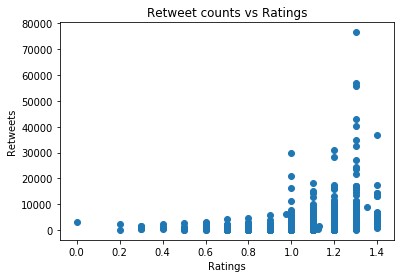

In [255]:
plt.scatter(twitter_full.rating, twitter_full.retweet_count)
plt.title('Retweet counts vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Retweets')
plt.savefig('retweet_ratings')

**Conclusion:** The relationship between retweet counts and ratings appears weak. When ratings exceed 1.0, it does seem like we see a higher volume of tweets that have been retweeted.

**Question 2:** Do we see a relationship between favorites and retween counts?

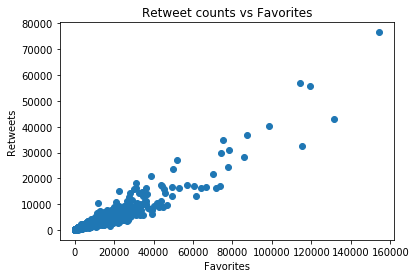

In [256]:
plt.scatter(twitter_full.favorite_count, twitter_full.retweet_count)
plt.title('Retweet counts vs Favorites')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.savefig('retweet_favorites')

**Concluson 2:** There looks to be a fairly strong relationship between retweets and favorites. From looking at this visual I would be confident in saying that a retweeted tweet is more likely to generate a favorite. This is probably due to the fact that more people are seeing the tweet hence the greater likelyhood in a tweet being favorited.

**Question 3:** Is there a trend to be seen for retweet counts over time?

In [257]:
twitter_full_group = twitter_full.groupby('timestamp').retweet_count.sum().reset_index()
twitter_full_group.timestamp = twitter_full_group.timestamp.dt.strftime('%Y-%m')

In [258]:
twitter_timestamp_retweet = twitter_full_group.groupby('timestamp').retweet_count.sum().reset_index().sort_values(by = 'timestamp')


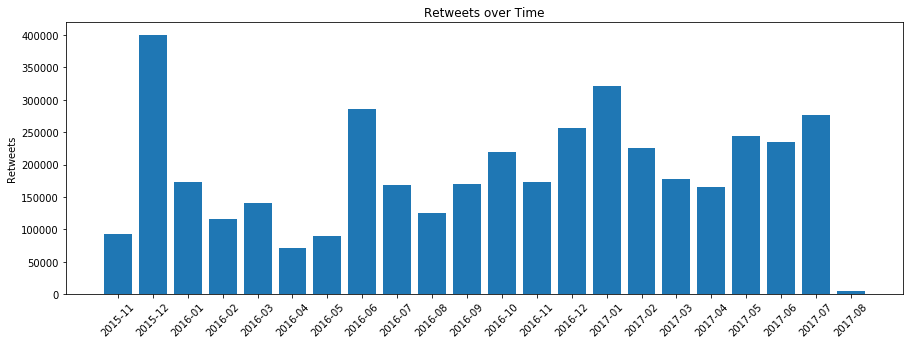

In [259]:
plt.figure(figsize = (15, 5))
plt.bar(twitter_timestamp_retweet.timestamp, twitter_timestamp_retweet.retweet_count)
plt.xticks(rotation = 45);
plt.title('Retweets over Time')
plt.ylabel('Retweets')
plt.savefig('retweet_time')

**Concluson 3:** There doesn't seem to be an obvious trend observed over time. The only standound stat is that 'December 2015' was the moth which generated the most cumulative number of retweets.

**Question 4:** What was the most rated Dog Type?

In [260]:
twitter_dogtype = twitter_full.dog_type.value_counts().reset_index()
twitter_dogtype['percentage_rating_count'] = twitter_dogtype.apply(lambda row: row.dog_type / twitter_dogtype.dog_type.sum(), axis = 1)
twitter_dogtype.rename(columns = {'index': 'type_dog', 'dog_type': 'rating_count'}, inplace = True)
twitter_dogtype.to_csv('dog_type_ratingcount.csv', index = False)
twitter_dogtype.head(10)

,type_dog,rating_count,percentage_rating_count
0,golden_retriever,157,0.093564
1,Labrador_retriever,106,0.063170
2,Pembroke,95,0.056615
3,Chihuahua,91,0.054231
4,pug,62,0.036949
5,toy_poodle,50,0.029797
6,chow,48,0.028605
7,Pomeranian,42,0.025030
8,Samoyed,41,0.024434
9,malamute,33,0.019666


**Conclusion 4:** It looks like 'golder_retreiver' and 'Labrador_retreiver' were the most rated dog types, featuring across ~ 15.6% of tweets.